In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
two_dice_image = cv2.imread("input/2_dice.png", cv2.IMREAD_GRAYSCALE)

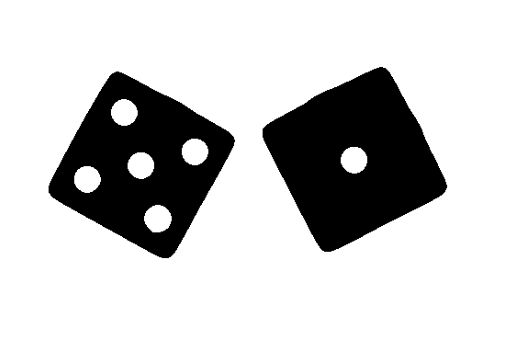

In [3]:
image = two_dice_image.copy()
noise_reduced_image = cv2.medianBlur(image, 7)
_, threshold_image = cv2.threshold(noise_reduced_image, 180, 255, cv2.THRESH_BINARY_INV)

plt.imshow(threshold_image, "grey")
plt.axis(False)
plt.show()

[5, 1]


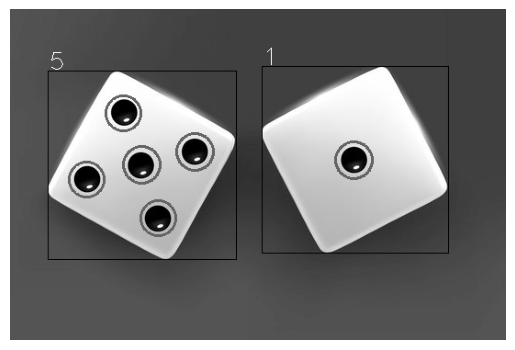

In [4]:
contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
counter = 0
number_dice_list = []

for contour in contours:
    if hierarchy[0][counter][3] == 0:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, [x, y], [x + w, y + h], (0, 0, 0), 1)

        rectangle_x = x
        rectangle_y = y
        dice = image[y: y + h, x: x + w]
        circles = cv2.HoughCircles(dice, cv2.HOUGH_GRADIENT, dp=1, minDist=50, param1=100, param2=30, minRadius=0, maxRadius=0)

        if circles is not None:
            number_in_dice = 0
            circles = np.round(circles[0, :]).astype("int")

            for (x, y, r) in circles:
                if r <= 15:
                    cv2.circle(image, (x+rectangle_x, y+rectangle_y), r+5, 100, 2)
                    number_in_dice += 1
        number_dice_list.append(number_in_dice)
        cv2.putText(image, str(number_in_dice), (rectangle_x, rectangle_y), cv2.FONT_HERSHEY_PLAIN, 2, 255)
    counter += 1

print(number_dice_list)
plt.imshow(image, "grey")
plt.axis(False)
plt.show()